# NLP Milestone 1
A notebook to preprocess youtube transcripts of Al Mokhbir Al Eqtsadi episodes.

In [2]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Data Loading

In [3]:
def read_episodes_files(file_path: str) -> pd.DataFrame:
    """
    Read all the episodes files in the file_path and return a DataFrame with the content of the files.
    """
    episodes_files = []
    for file in os.listdir(file_path):
        if file.endswith(".txt"):
            with open(file_path + file, 'r') as f:
                episodes_files.append(f.read())
    df = pd.DataFrame(episodes_files, columns=['episode_transcript'])
    return df

In [4]:
df = read_episodes_files('Al_Mokhbir_Al_Eqtisadi/raw_data/')
df.head()

,episode_transcript
0,بعد سبعه اشهر وانا لا اجرؤ على حذف شيء\nيخصك م...
1,عمان وقطر والبحرين والسعوديه دي هي الدول\nالعر...
2,على غير العادة وبدون أي مقدمات\nخلونا نبدأ الح...
3,من حوالي السنتين\nوتحديداً في 3 ديسمبر 2020\nج...
4,يوم 8 سبتمبر 2022\nتم إعلان وفاة ملكة بريطانيا...


### 2. Data Understanding

In [5]:
# View number of samples
df.shape

(222, 1)

In [6]:
# View average transcript length 
df['episode_transcript'].apply(len).mean()

14161.801801801801

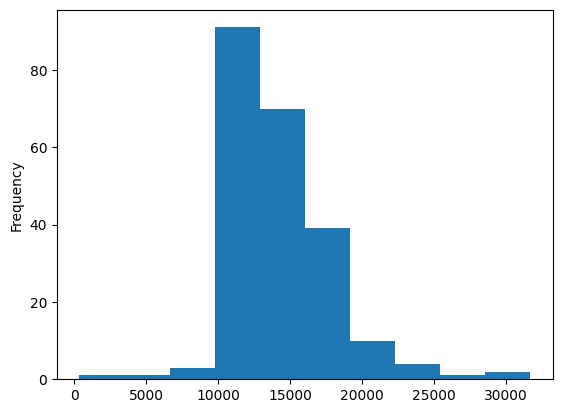

In [7]:
# View the histogram of transcript lengths
df['episode_transcript'].apply(len).plot(kind='hist')
plt.show()

In [8]:
# View a couple of samples
print(df.sample(1).values[0][0])

ضابط سابق في سلاح الجو الامريكي اسمه ويس
براينت الضابط ده قبل ما يتقاعد من الخدمه
في 2018 شارك في تنفيذ ضربات جويه لصالح
الجيش الامريكي في افغانستان والعراق
وسوريا المهم في تصريحات نشرتها اسوشيتد
بريس في 8 مايو الجاري براينت قال
الاسرائيليين شافوا احنا عملنا ايه في
الموصل في العراق وفي الرقه في سوريا
وعملوا 10 اضعافه في غزه وده في اشاره
واضحه منه لحجم الدمار اللي اتسبب فيه
الجيش الاسرائيلي في غزه واللي ما كانش
ممكن يوصل وصل للنطاق ده بدون الدعم
الامريكي لاسرائيل في ديسمبر 2023 الصحافه
الاسرائيليه اشارت الى ان الولايات
المتحده الامريكيه بعتت لاسرائيل
244 طياره شحن و20 سفينه محملين اكث من
100000 طن من مساعدات العسكريه للجيش
الاسرائيلي اللي بيقود حاليا عدوان غاشم
على قطاع غزه وفي مارس اللي فات مسؤولين
في الاداره الامريكيه بلغوا اعضاء
الكونجرس في احاطه سريه بان امريكا وافقت
على اكثر من 100 صفقه سلاح وذخيره
لاسرائيل من ساعه بدايه العدوان
الاسرائيلي على غزه باختصار الامريكان
بعتوا لاسرائيل في اخر سبع شهور كميات
رهيبه وغير مسبوقه من السلاح والذخيره
بدون السلاح والذخيره الامريكيه
الاسرائيليين 

In [9]:
# Check if there are any missing values
df.isna().sum()

episode_transcript    0
dtype: int64

In [10]:
# Check if there are any duplicates
df.duplicated().sum()

0

In [11]:
# Check if there are very short or very long transcripts
df['transcript_length'] = df['episode_transcript'].apply(len)
df['transcript_length'].describe()

count      222.000000
mean     14161.801802
std       3645.946027
min        370.000000
25%      11721.250000
50%      13418.500000
75%      16070.500000
max      31704.000000
Name: transcript_length, dtype: float64

### 3. Data Preprocessing & Cleaning

#### Tokenization

In [28]:
from farasa.segmenter import FarasaSegmenter
from typing import List

def tokenize(episodes: List[str]) -> List[List[str]]:
    """
    Tokenize a list of Arabic text strings using Farasa and clean the tokens.

    Args:
    - episodes (list of str): List of strings to be tokenized.

    Returns:
    - List of Lists: Cleaned and tokenized text for each episode.
    """
    farasa_segmenter = FarasaSegmenter()
    
    segmented_episodes = [farasa_segmenter.segment(episode) for episode in episodes]

    tokenized_episodes = []
    for episode in segmented_episodes:
        episode_split = episode.split()
        episode_tokenized = []
        for word in episode_split:
            if '+' in word:
                word_split = word.split('+')
                episode_tokenized.extend(word_split)
            else:
                episode_tokenized.append(word)
        tokenized_episodes.append(episode_tokenized)

    return tokenized_episodes


In [29]:
episodes = [
    "مرحبا بكم في حلقة جديدة من قناتنا على يوتيوب!",
    "في هذه الحلقة، سنتحدث عن أحدث الأخبار في التكنولوجيا."
]

cleaned_tokenized = tokenize(episodes)
print(cleaned_tokenized)

[['مرحب', 'ا', 'ب', 'كم', 'في', 'حلق', 'ة', 'جديد', 'ة', 'من', 'قنا', 'ت', 'نا', 'على', 'يوتيوب', '!'], ['في', 'هذه', 'ال', 'حلق', 'ة', '،', 'س', 'نتحدث', 'عن', 'أحدث', 'ال', 'أخبار', 'في', 'ال', 'تكنولوجيا', '.']]
